### Simple Regression


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [8]:
advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


c:\Users\assd4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


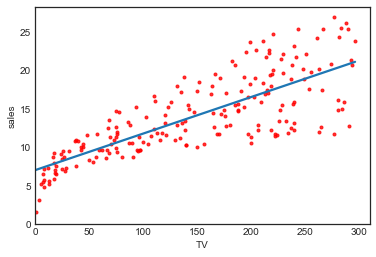

In [6]:
#display the regression line using seaborn
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(ymin=0);

First we use the sklearn module to do linear regression. The intercept is $\beta_0$ and the coefficent is $\beta_1$

In [9]:
# Regression coefficients (Ordinary Least Squares)
lm = LinearRegression()

X = advertising.TV
X=  np.array(X).reshape(-1,1)
Y = advertising.sales

lm.fit(X,Y)
print('intercept is ',lm.intercept_)
print('coefficent is ',lm.coef_)

intercept is  7.032593549127694
coefficent is  [0.04753664]


use statsmodel for linear regression

In [20]:
#use statsmodel for linear regression
est = smf.ols('sales ~ TV', advertising).fit()
print( est.summary().tables[0] )
print( est.summary().tables[1] )
print( est.summary().tables[2] )

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.47e-42
Time:                        00:42:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

### Perform the same simple regression on radio and newspaper (using statsmodels)

In [22]:
#simple regression on radio
lm_radio = LinearRegression()

X_radio =advertising.radio
X_radio= np.array(X_radio).reshape(-1,1)
lm_radio.fit(X_radio,Y)

print('intercept is ' ,lm_radio.intercept_)
print('coefficent',lm_radio.coef_)
print("p-value of t-statistic is small,t-statistic is significance")

est_radio = smf.ols('sales ~ radio', advertising).fit()
print( est_radio.summary().tables[0] )
print( est_radio.summary().tables[1] )
print( est_radio.summary().tables[2] )

intercept is  9.311638095158283
coefficent [0.20249578]
p-value of t-statistic is small,t-statistic is significance
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           4.35e-19
Time:                        00:45:34   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [23]:
lm_newspaper = LinearRegression()

X_newspaper=advertising.newspaper
X_newspaper= np.array(X_newspaper).reshape(-1,1)
lm_newspaper.fit(X_newspaper,Y)

print(lm_newspaper.intercept_)
print(lm_newspaper.coef_)
print("p-value of t-statistic is small,t-statistic is significance")

est_newspaper = smf.ols('sales ~newspaper', advertising).fit()
print( est_newspaper.summary().tables[0] )
print( est_newspaper.summary().tables[1] )
print( est_newspaper.summary().tables[2] )

12.351407069278162
[0.0546931]
p-value of t-statistic is small,t-statistic is significance
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 01 Oct 2022   Prob (F-statistic):            0.00115
Time:                        00:46:35   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### Multiple Regression

Perform multiple regression on TV, radio and newspaper

### Question:
1. Which predictor(s) has significant association with sales? Which does not?
2. Did you have a different answer when performing individual simple regression on each predictor( radio, TV and newspaper separately). Explain the results.
3. What is th $R^2$ value for TV alone, and TV and radio (please read pg 79-80 ISLR book). Comment of the $R^2$ value obtained.



### Answer
1.TV and radio have significant association with sales,newspaper has no association with sales.  
2.result of individual simple regression on each predictor.  

$R^2$ value for TV is 0.612  
$R^2$ value for radio is 0.332  
$R^2$ value for newspaper is 0.052  
It can be seen from the individual $R^2$ value that the $R^2$ value of TV and Radio are relatively high, while the $R^2$ value of newspapers is relatively low. Therefore, judging from the results of whether the variables are significant, the results of individual simple regressions are no different from the results of multiple regressions. TV and Radio are both significant, while newspapers are less significant  
3.
  
$R^2$ value for TV alone is 0.612. It represents the proportion of sales variation that can be explained by TV, and represents the explanatory power of the regression model,$R^2$ is high, which means this is a good model   

$R^2$ value for TV and radio is 0.897. It represents the proportion of sales variation that can be explained by TV and radio, and represents the explanatory power of the regression model,$R^2$ is very high, indicating that this is a good model   

In [30]:
est_Multiple = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
print(est_Multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        00:56:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [31]:
est = smf.ols('sales ~ TV + radio', advertising).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           4.83e-98
Time:                        00:56:20   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [33]:
## correation
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Extensions to Linear Model -Interaction Model

The standard linear model makes two important assumptions. They state that the relationship between the predictors and response are additive and linear. The additive assumption means that the effect of changes in a predictor $X_j$ on the response Y is independent of the values of the other predictors. The linear assumption states that the change in the response Y due to a one-unit change in $X_j$ is constant, regardless of the value of $X_j$. 

We may need to consider interaction effect between predictors, that is, predictors are not independent but depend on each other. For example, given a fixed budget of \$100,000, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio. 

In the standard linear model, an increase in $X_1$ will increase by an average of $\beta_1$ units. Notice that the presence of $X_2$ does not alter this statement—that is, regardless of the value of $X_2$, a one-unit increase in $X_1$ will lead to a $\beta_1$-unit increase in Y.

$$ Y=\beta_0+\beta_1X_1+\beta_2X_2 + \epsilon $$


One way of extending this model to allow for interaction effects is to include a third predictor, called an interaction term, which is constructed by computing the product of $X_1$ and $X_2$. This results in the model:


$$ Y=\beta_0+\beta_1X_1+\beta_2 X_2+\beta_3 X_1 X_2+\epsilon $$
   


We test this using the following code :

```
est = smf.ols('Response ~ X1 + X2 + X1*X2', advertising).fit()
est.summary().tables[1]
```

### Questions:
1. Obtain the linear model with TV, radio and interaction term TV*radio. Which predictors are significant? Which predictors should be used in the model? What is the $R^2$ value?

### Answer
because the p-value of TV, radio and interaction term are smaller than 0.05.  
TV, radio and interaction term are significant,these predictors should be used in the model.  
$R^2$ value is 0.968

In [35]:
est = smf.ols('sales ~ TV + radio + TV*radio ', advertising).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          6.68e-146
Time:                        00:58:31   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

### Non-linear data : Polynomial Regression

Read in the auto.csv file.  
Plot out the data using (1) linear line (2) polynomial degree 2 (3) polynomail degree 5

Which line fits best? There is a pronounced relationship between mpg and horsepower, but it seems clear that this relationship is in fact non-linear: the data suggest a curved relationship. 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


c:\Users\assd4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\assd4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\assd4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


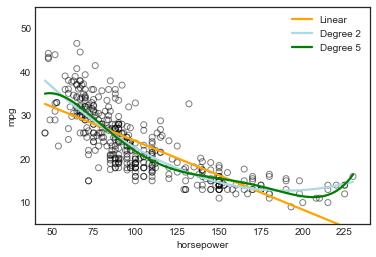

In [37]:
auto = pd.read_csv('Auto.csv', na_values='?').dropna() #drop NA values
auto.info()
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

The linear regression model assumes a linear relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be nonlinear. We can directly extend the linear model to accommodate non-linear relationships by using polynomial regression.

We can transform the model (which still remains a linear model in X): 

$$  mpg=\beta_0+\beta_1 \times horsepower + \beta_2 \times horsepower^2 $$

We can still use standard linear regression software to estimate $\beta_0$, $\beta_1$, and $\beta_2$ in order to produce a non-linear fit.

To do so make another column to store the $horsepower^2$ values (quadratic):
```
auto['horsepower2'] = auto.horsepower**2
auto.head(3)
```
Then run the statsmodels ols module as before to compare the linear and quadratic fit.

### Question:
1. Which model is better linear or quadratic (or higher degree)? How do you make the judgement?


### Answer
R-squared value of linear model is 0.606  
R-squared value of quadratic model is 0.688  
Quadratic model is better than linear model,because R-squared value of quadratic model is higher than linear model  
The Quadratic model is more explanatory.

In [39]:
#linear regression
lm_linear_auto_ = LinearRegression()

X_horsepower = auto.horsepower
X_horsepower = np.array(X_horsepower).reshape(-1,1)

Y_mpg=auto.mpg

lm_linear_auto_.fit(X_horsepower,Y_mpg)

est_auto = smf.ols('mpg ~ horsepower',auto).fit()
print(est_auto.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           7.03e-81
Time:                        00:59:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [41]:
#quadratic regression
lm_quadratic_auto_ = LinearRegression()

auto['horsepower2'] = auto.horsepower**2

X_horsepower2 = auto.horsepower2
X_horsepower2 = np.array(X_horsepower2).reshape(-1,1)

Y_mpg=auto.mpg

lm_quadratic_auto_.fit(X_horsepower2,Y_mpg)

est_auto_quadratic = smf.ols('mpg ~ horsepower+horsepower2 ',auto).fit()
print( est_auto_quadratic.summary() )

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           5.40e-99
Time:                        00:59:51   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      